<a href="https://colab.research.google.com/github/emilyjiminroh/Music_Video_Generator-MuLife/blob/main/MuLife_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Riffusion 모델을 사용한 음악 생성기

Text - Spectogram(이미지) - 음악 생성 AI

Stable Diffusion 1.5 기반

모델: https://huggingface.co/riffusion/riffusion-model-v1


### 패키지 설치

In [1]:
!git clone https://huggingface.co/spaces/fffiloni/spectrogram-to-music riffusion
!pip install -qq -U typing pydub diffusers transformers accelerate scipy gradio

Cloning into 'riffusion'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (264/264), done.
remote: Total 269 (delta 162), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (269/269), 37.27 KiB | 5.32 MiB/s, done.
Resolving deltas: 100% (162/162), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 12

### 패키지 로드

In [2]:
import gradio as gr #AI app
import torch #AI performance
from PIL import Image #image processing
import numpy as np # operation
from diffusers import StableDiffusionPipeline #stable diffusion
from diffusers import StableDiffusionImg2ImgPipeline
from IPython.display import Audio #audio prcessing


from riffusion.spectro import wav_bytes_from_spectrogram_image, image_from_spectrogram #spectorgram

### 모델 로드

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu" #import cuda
MODEL_ID = "riffusion/riffusion-model-v1"

pipe = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe = pipe.to(device)

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

### Spectogram 이미지 생성

  0%|          | 0/50 [00:00<?, ?it/s]

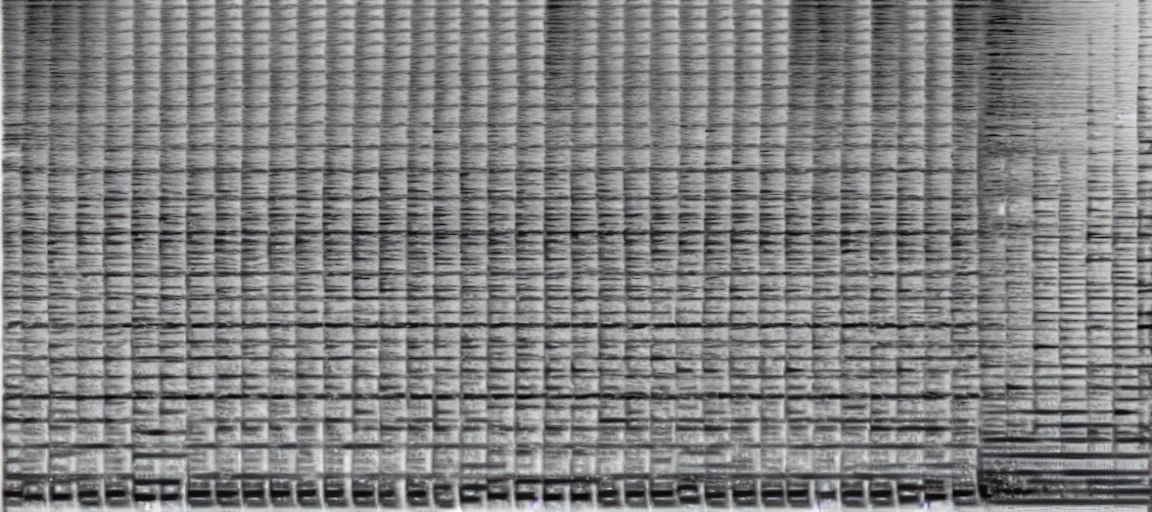

In [4]:
prompt = "Exercising graduated student" #text
negative_prompt = "slow" 
duration = 10 # T4에서는 10초 정도가 한계

width_duration = 512 + ((int(duration) - 5) * 128)

spec = pipe(prompt, negative_prompt=negative_prompt, height=512, width=width_duration).images[0]

spec

### Spectogram to Wav File

In [5]:
wav = wav_bytes_from_spectrogram_image(spec)

with open("output.wav", "wb") as f:
    f.write(wav[0].getbuffer())

Audio("output.wav")

### Style Transfer
### Image2Image 모델 로드

In [6]:
pipe2 = StableDiffusionImg2ImgPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe2 = pipe2.to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

### 입력 Spectogram 이미지 확인

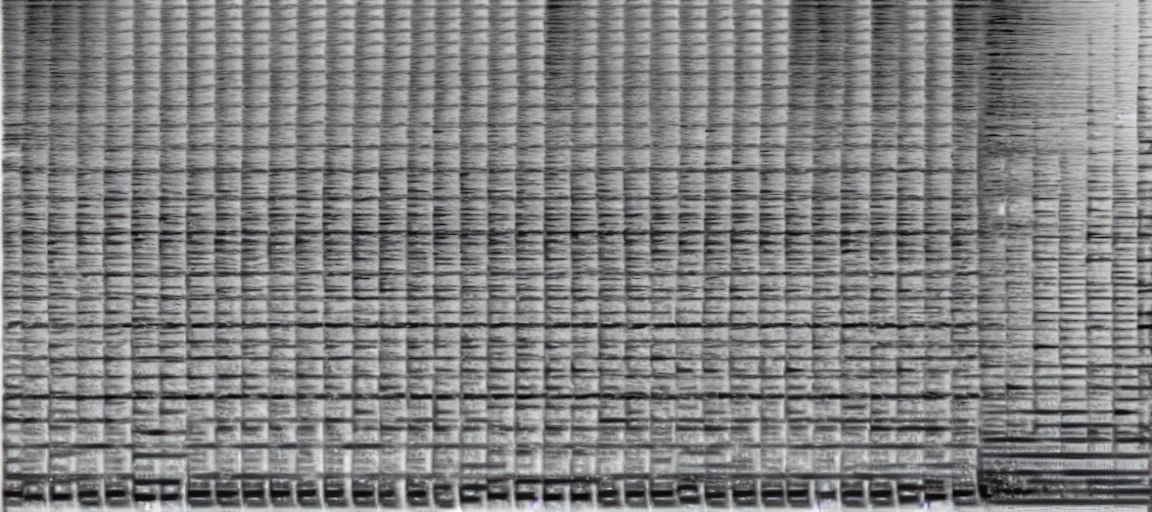

In [7]:
spec

### 새로운 스타일의 Spectogram

  0%|          | 0/37 [00:00<?, ?it/s]

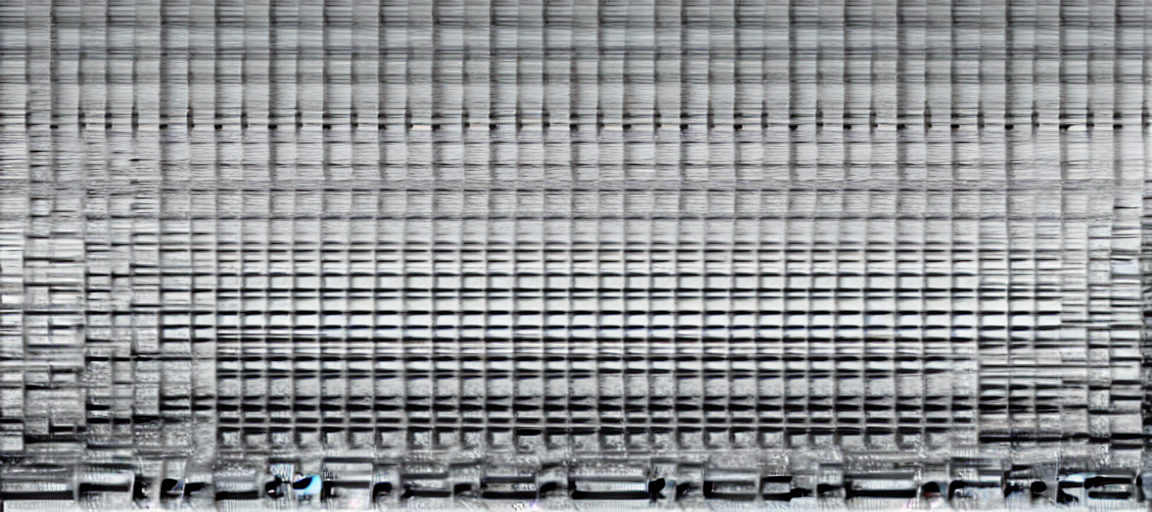

In [8]:
prompt = "lovely jazz"
strength = 0.75
guidance_scale = 15

new_spec = pipe2(prompt=prompt, image=spec, strength=strength, guidance_scale=guidance_scale).images[0]

new_spec

In [9]:
wav = wav_bytes_from_spectrogram_image(new_spec)

with open("output2.wav", "wb") as f:
    f.write(wav[0].getbuffer())

Audio("output2.wav")

In [12]:
!nvidia-smi

Mon Jan 23 10:11:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    29W /  70W |  12004MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
!pip install -q https://github.com/camenduru/stable-diffusion-webui-colab/releases/download/0.0.15/xformers-0.0.15.dev0+189828c.d20221207-cp38-cp38-linux_x86_64.whl


In [19]:
! pip install -U transformers diffusers gradio ftfy pydub -q 

In [21]:
!wget https://github.com/riffusion/riffusion/blob/main/riffusion/audio_splitter.py

--2023-01-23 10:19:15--  https://github.com/riffusion/riffusion/blob/main/riffusion/audio_splitter.py
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘audio_splitter.py’

audio_splitter.py       [ <=>                ] 220.18K  --.-KB/s    in 0.01s   

2023-01-23 10:19:16 (16.2 MB/s) - ‘audio_splitter.py’ saved [225463]



In [22]:
import random
COLORS = [
    ["#ff0000", "#00ff00"],
    ["#00ff00", "#0000ff"],
    ["#0000ff", "#ff0000"],
]    
      

In [26]:
pipe3 = StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16)
pipe3 = pipe.to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [28]:
img_model_id = "runwayml/stable-diffusion-v1-5"
img_pipe = StableDiffusionPipeline.from_pretrained(img_model_id, torch_dtype=torch.float16, revision="fp16")
img_pipe = img_pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [29]:
prompt = 'kid in the park' 


In [30]:
spectogram = pipe(prompt).images[0]
wav = wav_bytes_from_spectrogram_image(spectogram)
with open("output.wav", "wb") as f:
    f.write(wav[0].getbuffer())

  0%|          | 0/50 [00:00<?, ?it/s]

In [32]:
image = img_pipe(prompt + ", artstation hall of fame gallery, editors choice, #1 digital painting of all time, most beautiful image ever created, emotionally evocative, greatest art ever made, lifetime achievement magnum opus masterpiece, the most amazing breathtaking image with the deepest message ever painted, a thing of beauty beyond imagination or words").images[0]  


  0%|          | 0/50 [00:00<?, ?it/s]

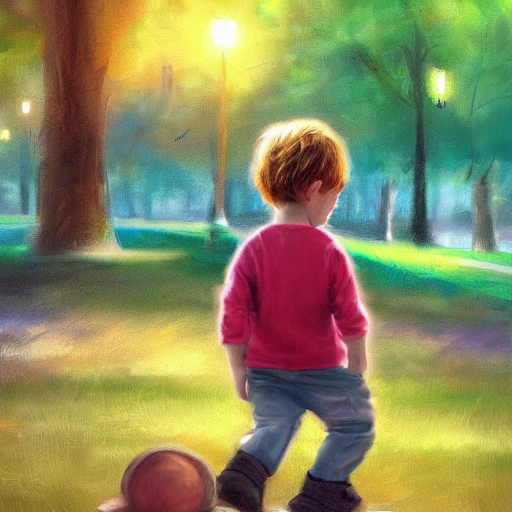

In [33]:
image

In [34]:

image.save("img.png")

In [35]:

video_path = gr.make_waveform('output.wav', bg_image='img.png', bars_color=random.choice(COLORS))

In [36]:
from IPython.display import HTML
from base64 import b64encode
 
def show_video(video_path, video_width = 600):
   
  video_file = open(video_path, "r+b").read()
 
  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")
 
show_video(video_path)

In [37]:
def audio_gen(prompt):
    spectogram = pipe(prompt).images[0]
    wav = wav_bytes_from_spectrogram_image(spectogram)
    with open("output.wav", "wb") as f:
        f.write(wav[0].getbuffer())
    print("audio saved")
    print("img started")
    txt_prompt = prompt + ", artstation hall of fame gallery, editors choice, #1 digital painting of all time, most beautiful image ever created, emotionally evocative, greatest art ever made, lifetime achievement magnum opus masterpiece, the most amazing breathtaking image with the deepest message ever painted, a thing of beauty beyond imagination or words"
    image = img_pipe(txt_prompt).images[0] 
    image.save("img.png") 
    print("img saved")
    video = gr.make_waveform('output.wav', bg_image='img.png', bars_color=random.choice(COLORS))
    print("video done!")
    return ('output.wav',video)

In [38]:

audio_gen("lazy nights")

  0%|          | 0/50 [00:00<?, ?it/s]

audio saved
img started


  0%|          | 0/50 [00:00<?, ?it/s]

img saved
video done!


('output.wav', '/tmp/tmp6x_w8meq.mp4')

In [40]:
gr.Interface(
    audio_gen,
    inputs=[gr.Textbox(label="prompt")],
    outputs=[
        gr.Audio(type='filepath'),
        gr.Video(type='filepath')
    ],
    title = 'Riffusion + Stable Diffusion AI Music Video Genrater - MuLife'
).launch(debug = True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
